In [39]:
# Wavelet Tutorial http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

from skimage import data_dir
from skimage.io import imread
import pywt

figsize=(16, 9)

In [2]:
# Signal - Smoothed Brownian Motion
def brownian(x0, n, dt, delta, s=False):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta * np.sqrt(dt))
    b = np.cumsum(r, axis=-1)
    
    if s:
        w = n//50
        b = pd.Series(b).rolling(w, min_periods=1).mean().values  # Moving Average Smoothing
        
    return b

In [3]:
# Wavelet families
print(pywt.families(), len(pywt.families()))
print(pywt.families(short=False))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'] 14
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


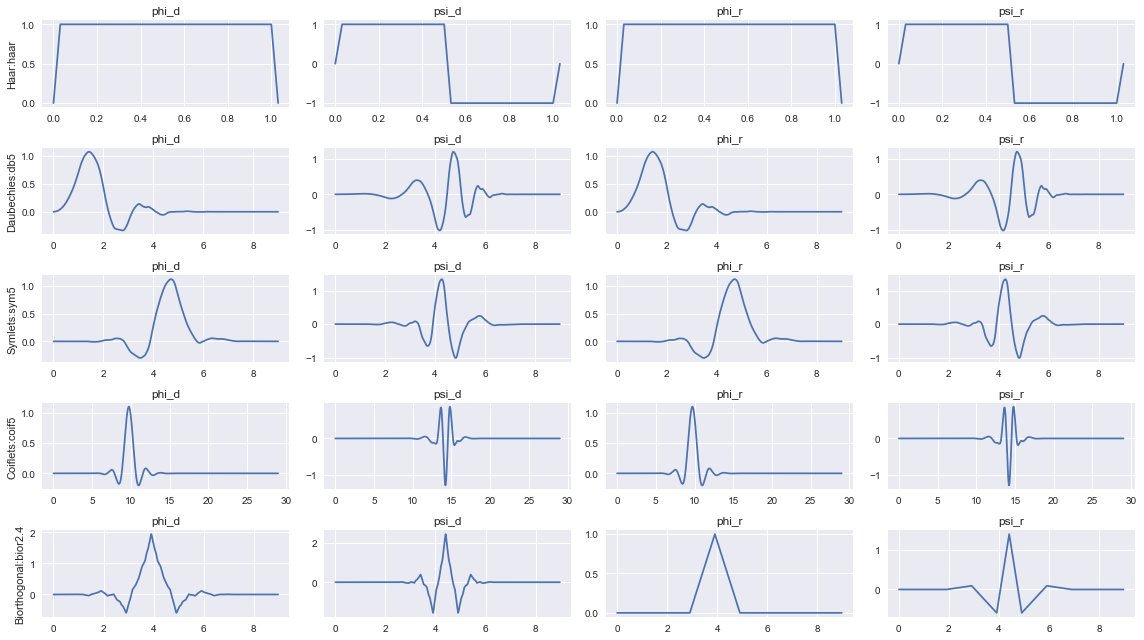

In [4]:
# Discrete Wavelets
discrete_wavelets = ["haar", 'db5', 'sym5', 'coif5', 'bior2.4']

level = 5  # Refinement level
fig, ax = plt.subplots(len(discrete_wavelets), 4, figsize=figsize)
for i, wavelet_name in enumerate(discrete_wavelets):
    wavelet = pywt.Wavelet(wavelet_name)
    
    if len(wavelet.wavefun()) == 3:
        phi_d, psi_d, t = wavelet.wavefun(level=level)
        phi_r, psi_r = phi_d, psi_d
    else:
        phi_d, psi_d, phi_r, psi_r, t = wavelet.wavefun(level=level)
    
    # print(wavelet_name, phi_d.shape, psi_d.shape, phi_r.shape, psi_r.shape, t.shape)
    # print(wavelet)
    
    # Wavelet properties
    # print("phi: mean = {:.3f}\t energy = {:.3f}".format(phi_d.mean(), np.square(phi_d).mean()))
    # print("psi: mean = {:.3f}\t energy = {:.3f}".format(psi_d.mean(), np.square(psi_d).mean()))
    
    # Decomposition wavelets
    ax[i, 0].set_ylabel("{}:{}".format(wavelet.family_name, wavelet_name))
    
    ax[i, 0].plot(t, phi_d)
    ax[i, 0].set_title("phi_d")
    ax[i, 1].plot(t, psi_d)
    ax[i, 1].set_title("psi_d")

    # Reconstruction wavelets
    ax[i, 2].plot(t, phi_r)
    ax[i, 2].set_title("phi_r")
    ax[i, 3].plot(t, psi_r)
    ax[i, 3].set_title("psi_r")

plt.tight_layout()
plt.show()

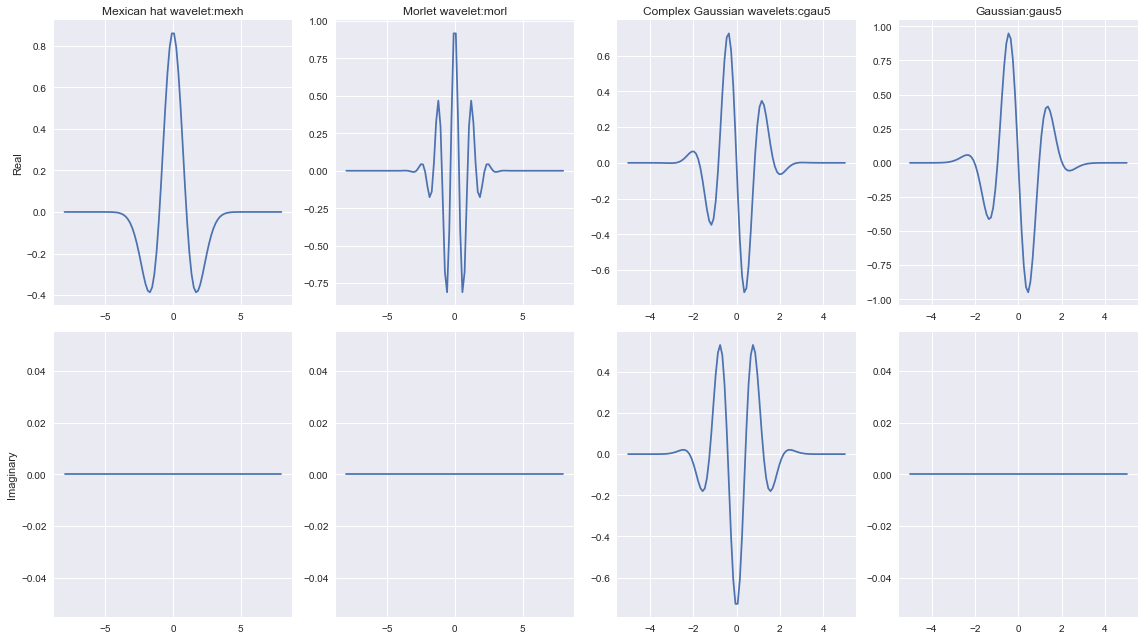

In [5]:
# Continuous Wavelets
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

level = 1  # Refinement level
length = 100
fig, ax = plt.subplots(2, len(continuous_wavelets), figsize=figsize)
for i, wavelet_name in enumerate(continuous_wavelets):
    wavelet = pywt.ContinuousWavelet(wavelet_name)
    
    
    # Continuous wavelet approximation
    psi, t = wavelet.wavefun(level=level, length=length)
    
    # print(wavelet)
    # print(psi.shape, t.shape)
    
    # Wavelet properties
    # print("psi: mean = {:.3f}\t energy = {:.3f}".format(psi.mean(), np.square(np.abs(psi)).mean()))
    
    # Real
    ax[0, i].plot(t, np.real(psi))
    ax[0, i].set_title("{}:{}".format(wavelet.family_name, wavelet_name))
    
    # Imaginary
    ax[1, i].plot(t, np.imag(psi))
    
ax[0, 0].set_ylabel("Real")
ax[1, 0].set_ylabel("Imaginary")
plt.tight_layout()
plt.show()

['haar']


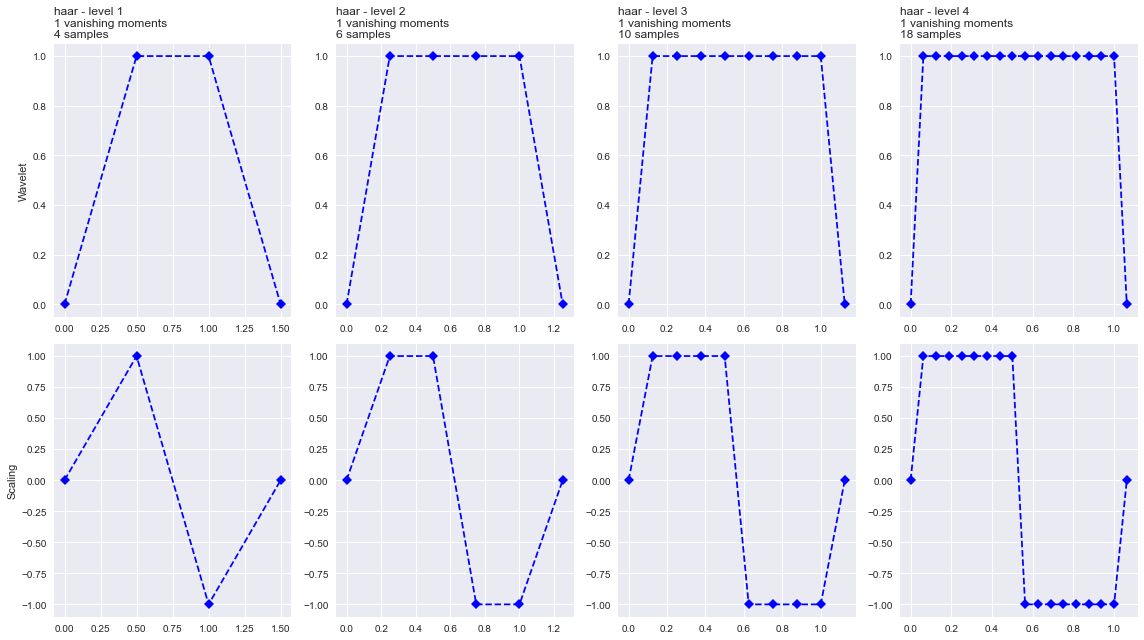

In [6]:
# Haar wavelets
# Daubechies wavelets
haar_wavelets = pywt.wavelist("haar")
print(haar_wavelets)

wavelet = pywt.Wavelet("haar")
no_moments = wavelet.vanishing_moments_psi
family_name = wavelet.family_name

levels = 4
fig, ax = plt.subplots(ncols=levels, nrows=2, figsize=figsize)    
for i, level in enumerate(range(1, levels + 1)):
    phi, psi, t = wavelet.wavefun(level=level)
    ax[0, i].set_title("haar - level {}\n{} vanishing moments\n{} samples".format(level, no_moments, len(t)), 
                       loc='left')
    
    # Wavelet function
    ax[0, i].plot(t, phi, 'bD--')
    
    # Scaling function
    ax[1, i].plot(t, psi, 'bD--')
    
ax[0, 0].set_ylabel("Wavelet")
ax[1, 0].set_ylabel("Scaling")
plt.tight_layout()
plt.show()

['db1', 'db2', 'db3', 'db4']


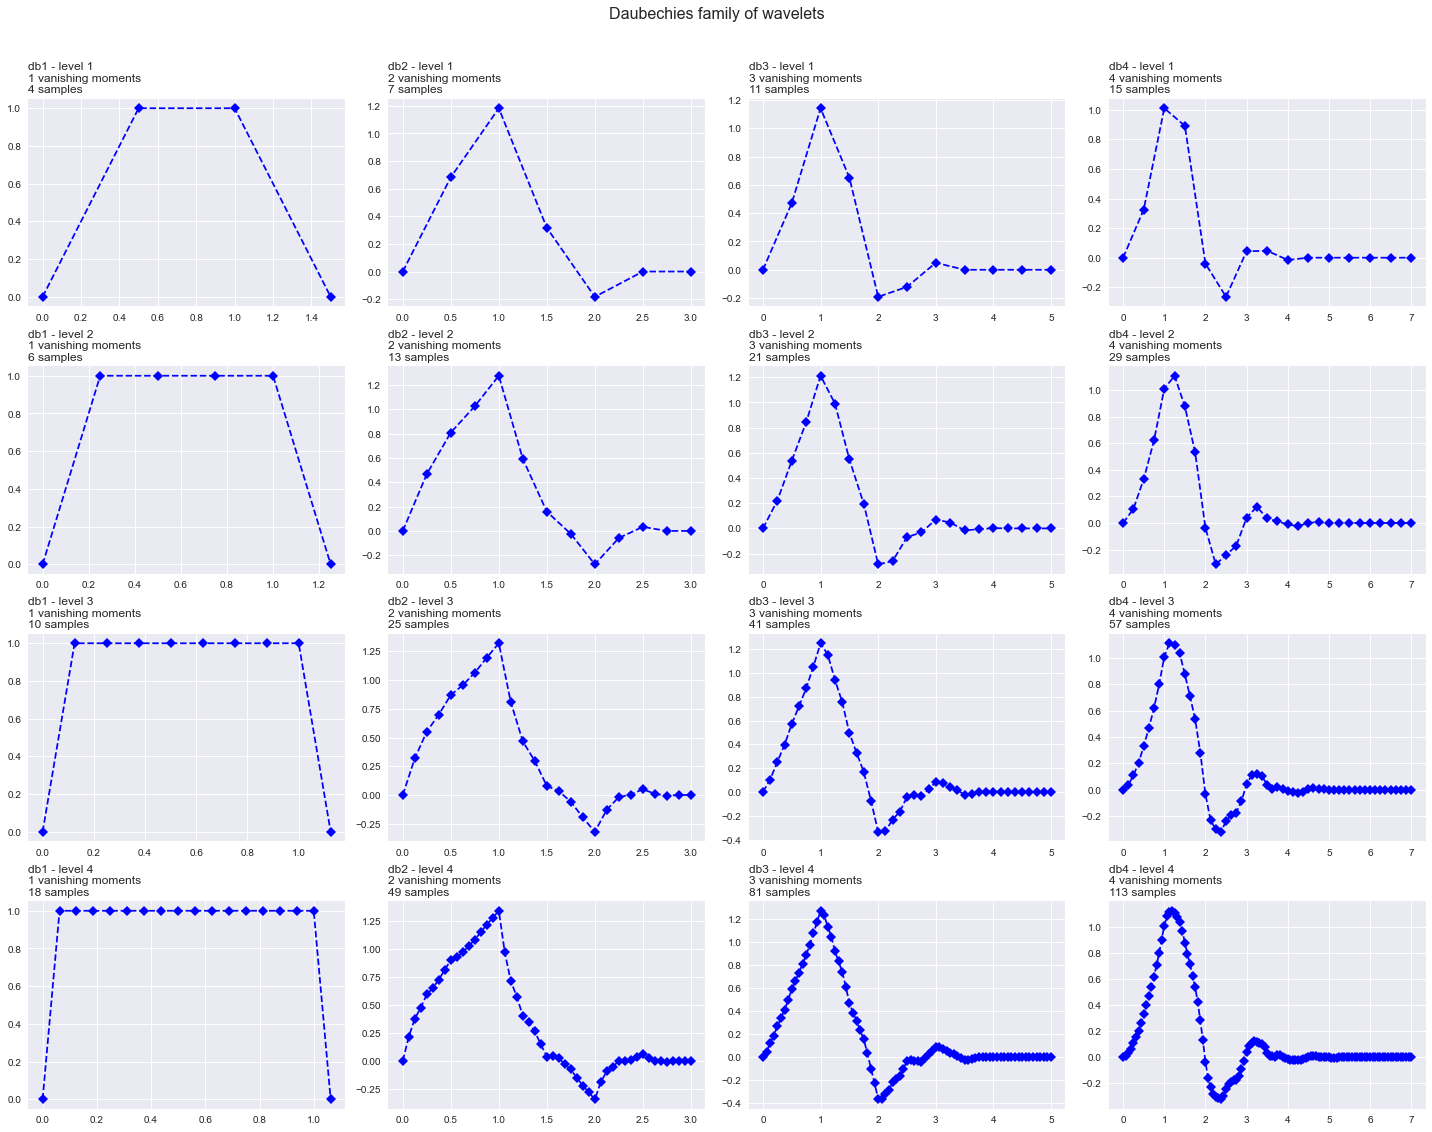

In [7]:
# Daubechies wavelets
db_wavelets = pywt.wavelist("db")[:4]
print(db_wavelets)

levels = 4
fig, axarr = plt.subplots(ncols=len(db_wavelets), nrows=levels, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    
    for row_no, level in enumerate(range(1,levels + 1)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level=level)
        axarr[row_no, col_no].set_title(
            "{} - level {}\n{} vanishing moments\n{} samples".format(waveletname, level, 
                                                                     no_moments, 
                                                                     len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

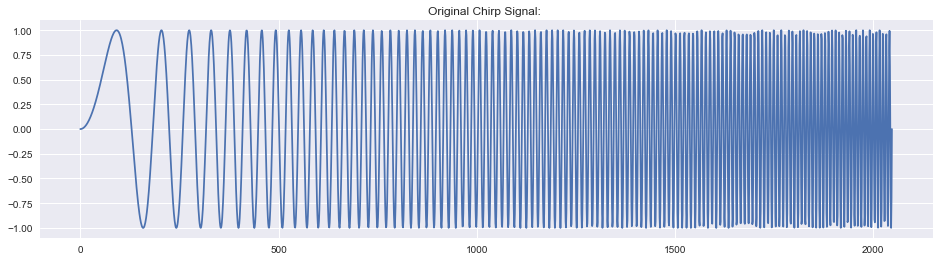

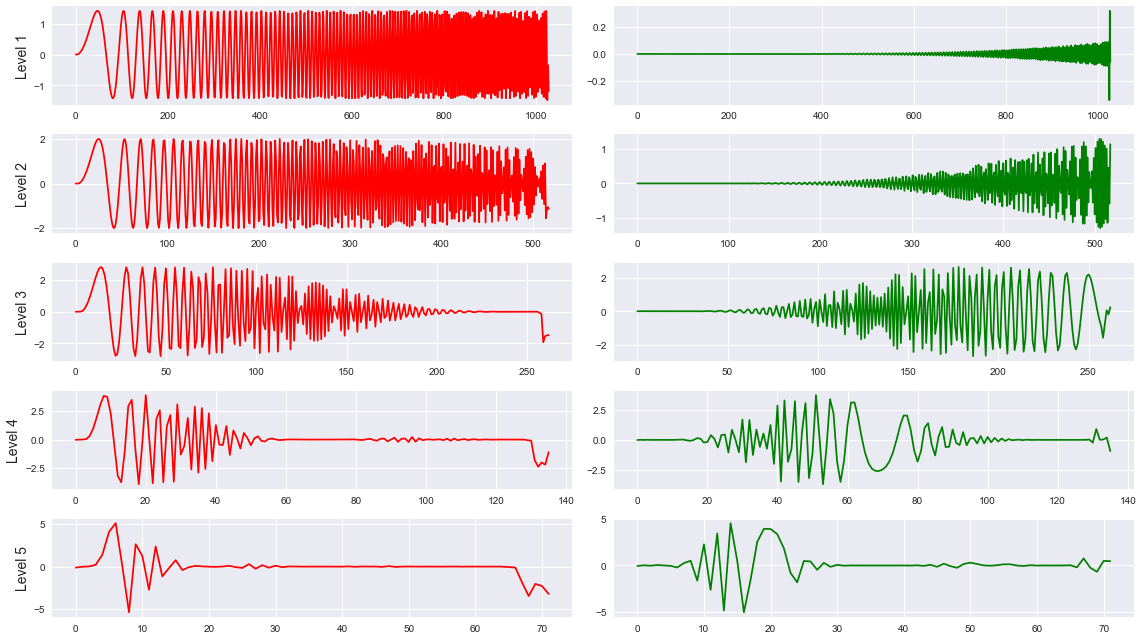

In [8]:
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(16,4))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=figsize)
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)

plt.tight_layout()
plt.show()

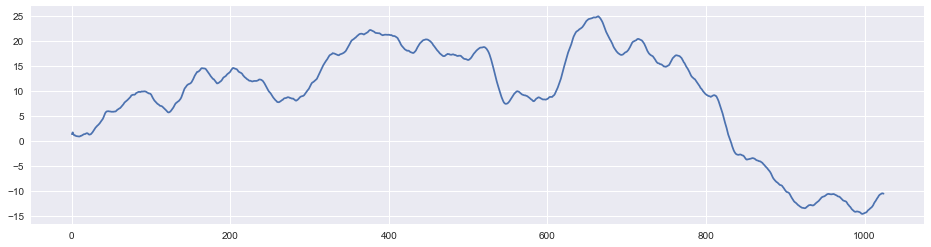

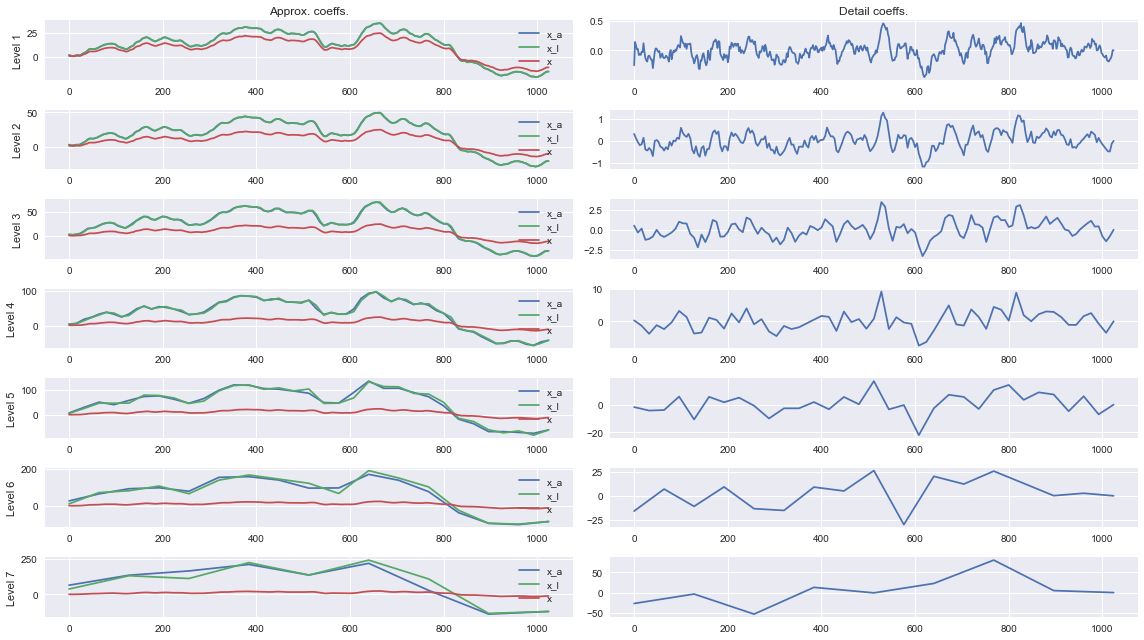

In [9]:
# Discrete Wavelet Transform
# Haar wavelet
np.random.seed(10)

N = 1025
t = np.arange(N)
x = brownian(0, N, t[1] - t[0], 1, True)

# t = np.linspace(0, 1, N)
# x = np.sin(50 * np.pi * t**2)

plt.figure(figsize=(16, 4))
plt.plot(t, x)
plt.show()

x_a = x
tt = t

levels = 7
fig, ax = plt.subplots(nrows=levels, ncols=2, figsize=figsize)
for i, level in enumerate(range(1, levels + 1)):
    # Time decimation
    tt = t[0::2**(level)]
    
    # x_a approximation coefficients, x_d detail coefficients
    x_a, x_d = pywt.dwt(x_a, "haar")
    
    # Approximation
    ax[i, 0].plot(tt, x_a, label="x_a")
    ax[i, 0].plot(tt, x_a + x_d, label="x_l")
    ax[i, 0].plot(t, x, label="x")
    ax[i, 0].set_ylabel("Level {}".format(level))
    ax[i, 0].legend()
    
    # Detail
    ax[i, 1].plot(tt, x_d)
    
ax[0, 0].set_title("Approx. coeffs.")
ax[0, 1].set_title("Detail coeffs.")

plt.tight_layout()
plt.show()

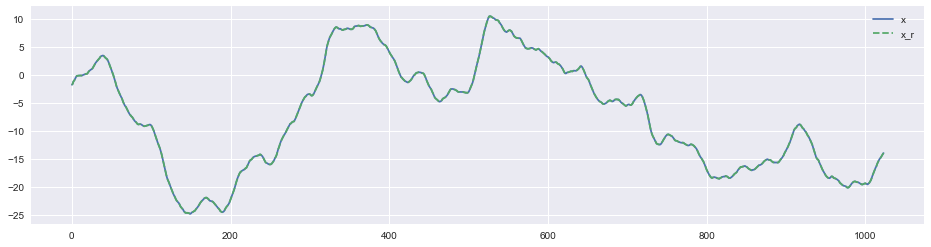

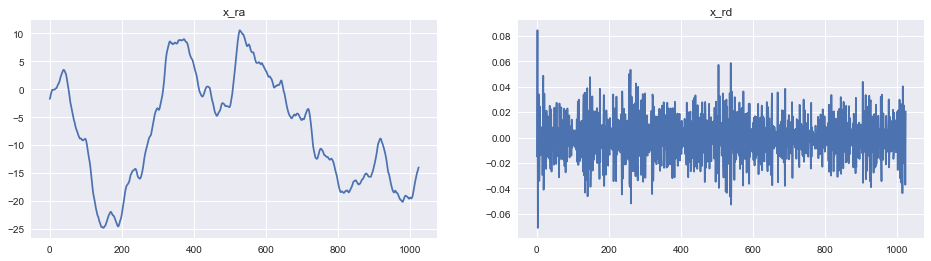

In [10]:
np.random.seed(100)
wavelet_name = "sym5"
N = 1024
t = np.arange(N)
x = brownian(0, N, t[1] - t[0], 1, True)

# DWT
cA, cD = pywt.dwt(x, wavelet_name)

# IDWT - Reconstruction
x_ra = pywt.idwt(cA, None, wavelet_name)
x_rd = pywt.idwt(None, cD, wavelet_name)
x_r = x_ra + x_rd

plt.figure(figsize=(16, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_r, label="x_r", linestyle="--")
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(t, x_ra, label="x_ra")
ax[0].set_title("x_ra")
ax[1].plot(t, x_rd, label="x_rd")
ax[1].set_title("x_rd")
plt.show()

8 (10,) [(10,), (18,), (34,), (66,), (130,), (258,), (513,)]


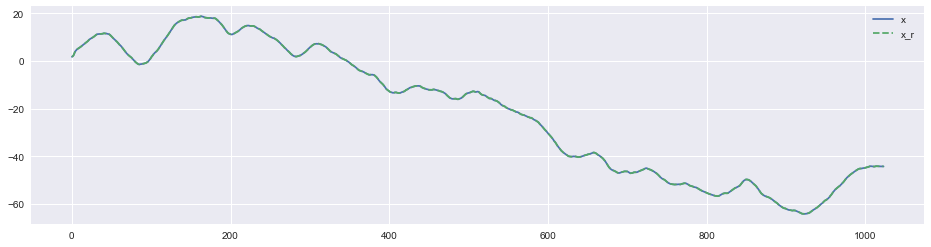

In [11]:
np.random.seed(0)
wavelet_name = "db2"
t = np.arange(N)
x = brownian(0, N, t[1] - t[0], 1, True)

# Wavedec
levels = 7
c = pywt.wavedec(x, wavelet_name, level=levels)

# [cAn, cDn, cDn-1, ..., cD2, cD1]
cA, cDs = c[0], c[1:]
print(len(c), cA.shape, [cD.shape for cD in cDs])

# Waverec - Reconstruction
x_r = pywt.waverec(c, wavelet_name)

# Full reconstruction
plt.figure(figsize=(16, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_r, label="x_r", linestyle="--")
plt.legend()
plt.show()

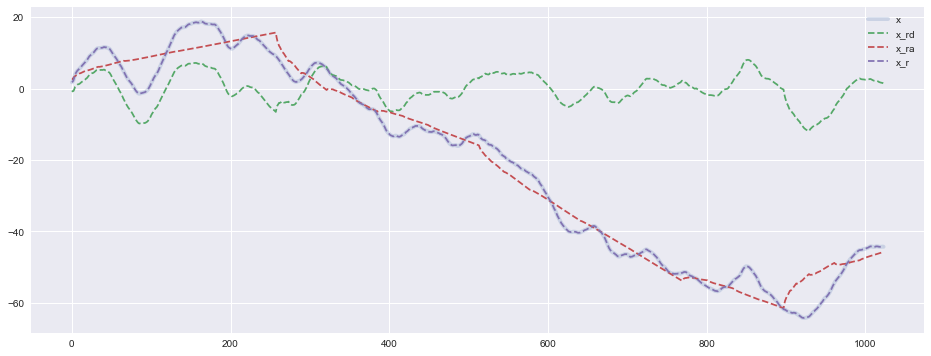

In [12]:
# Reconstruction Approximation
cd = [np.zeros_like(cA)]
cd.extend(cDs)
ca = [cA] + [np.zeros_like(coeff) for coeff in cDs]

x_rd = pywt.waverec(cd, wavelet_name)
x_ra = pywt.waverec(ca, wavelet_name)
x_r = x_rd + x_ra

# Reconstruction by parts
plt.figure(figsize=(16, 6))
plt.plot(t, x, label="x", alpha=0.2, linewidth=4)
plt.plot(t, x_rd, label="x_rd", linestyle="--")
plt.plot(t, x_ra, label="x_ra", linestyle="--")
plt.plot(t, x_r, label="x_r", linestyle="--")
plt.legend()
plt.show()

[True, False, False, False, False, False, False]
[True, True, False, False, False, False, False]
[True, True, True, False, False, False, False]
[True, True, True, True, False, False, False]
[True, True, True, True, True, False, False]
[True, True, True, True, True, True, False]
[True, True, True, True, True, True, True]


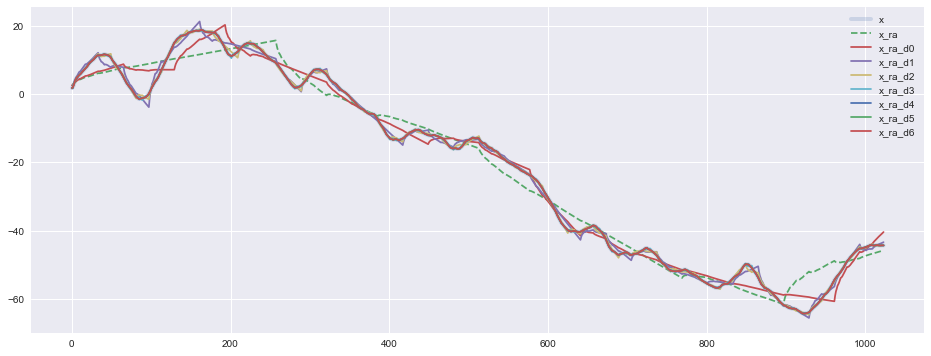

6 [False, False, False, False, False, False, True]
5 [False, False, False, False, False, True, True]
4 [False, False, False, False, True, True, True]
3 [False, False, False, True, True, True, True]
2 [False, False, True, True, True, True, True]
1 [False, True, True, True, True, True, True]
0 [True, True, True, True, True, True, True]


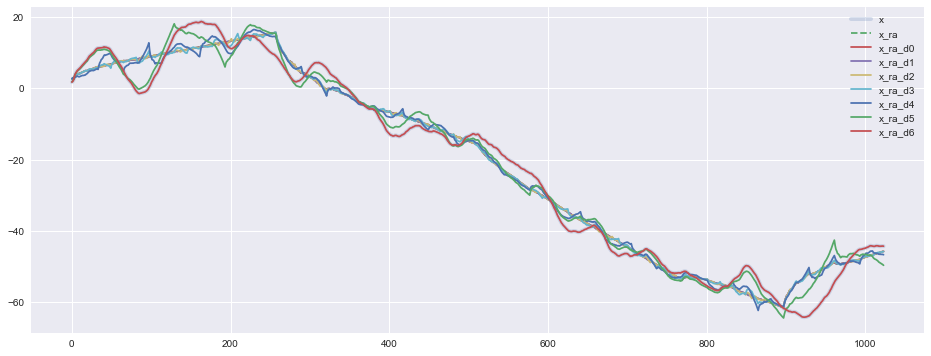

6 [False, False, False, False, False, False, True]
5 [False, False, False, False, False, True, False]
4 [False, False, False, False, True, False, False]
3 [False, False, False, True, False, False, False]
2 [False, False, True, False, False, False, False]
1 [False, True, False, False, False, False, False]
0 [True, False, False, False, False, False, False]


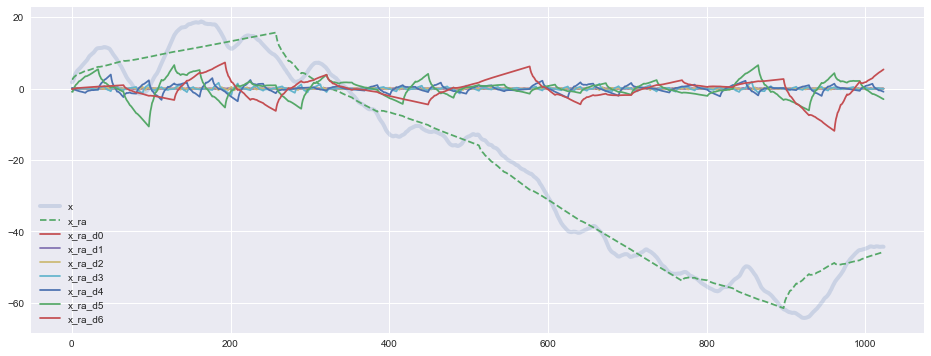

In [13]:
# Reconstruction by detail (large to small scale)
x_rns = []
mask = [False] * len(cDs)
for i in range(len(cDs)):
    mask[i] = True
    print(mask)
    cn = [cA] + [coeff if mask[j] else np.zeros_like(coeff) for j, coeff in enumerate(cDs)]
    x_rn = pywt.waverec(cn, wavelet_name)
    x_rns.append(x_rn)

plt.figure(figsize=(16, 6))
plt.plot(t, x, label="x", alpha=0.2, linewidth=4)
plt.plot(t, x_ra, label="x_ra", linestyle="--")
for i in range(0, 7):
    plt.plot(t, x_rns[i], label=f"x_ra_d{i}")
plt.legend()
plt.show()

# Reconstruction by detail (small to large scale)
x_rns = []
mask = [False] * len(cDs)
for i in range(len(cDs)-1, -1, -1):
    mask[i] = True
    print(i, mask)
    cn = [cA] + [coeff if mask[j] else np.zeros_like(coeff) for j, coeff in enumerate(cDs)]
    x_rn = pywt.waverec(cn, wavelet_name)
    x_rns.append(x_rn)

plt.figure(figsize=(16, 6))
plt.plot(t, x, label="x", alpha=0.2, linewidth=4)
plt.plot(t, x_ra, label="x_ra", linestyle="--")
for i in range(0, 7):
    plt.plot(t, x_rns[i], label=f"x_ra_d{i}")
plt.legend()
plt.show()

# Reconstruction by detail (individual)
x_rns = []
for i in range(len(cDs)-1, -1, -1):
    mask = [False] * len(cDs)
    mask[i] = True
    print(i, mask)
    cn = [np.zeros_like(cA)] + [coeff if mask[j] else np.zeros_like(coeff) for j, coeff in enumerate(cDs)]
    x_rn = pywt.waverec(cn, wavelet_name)
    x_rns.append(x_rn)

plt.figure(figsize=(16, 6))
plt.plot(t, x, label="x", alpha=0.2, linewidth=4)
plt.plot(t, x_ra, label="x_ra", linestyle="--")
for i in range(0, 7):
    plt.plot(t, x_rns[i], label=f"x_ra_d{i}")
plt.legend()
plt.show()

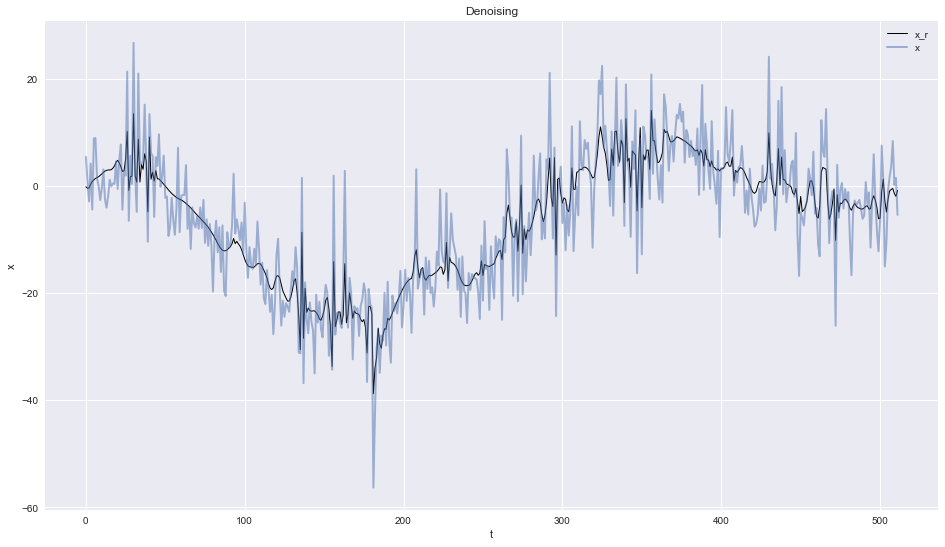

In [27]:
np.random.seed(100)
wavelet_name = "db5"
N = 512
t = np.arange(N)
x = brownian(0, N, t[1] - t[0], 1, True)
x = x + np.random.laplace(0, 5.0, N)

# Decomposition
c = pywt.wavedec(x, wavelet_name, mode="per")

# Denoising - Thresholding
thresh = 0.3 * np.nanmax(x)
c[1:] = (pywt.threshold(coeff, value=thresh, mode="soft") for coeff in c[1:])
# c[1:] = (None for coeff in c[1:])

# Reconstruction
x_r = pywt.waverec(c, wavelet_name, mode="per")
 
plt.figure(figsize=figsize)
plt.plot(t, x_r, "k", label="x_r", linewidth=1)
plt.plot(t, x, alpha=0.5, label="x", linewidth=2)
plt.legend()
plt.title("Denoising")
plt.ylabel("x")
plt.xlabel("t")
plt.show()

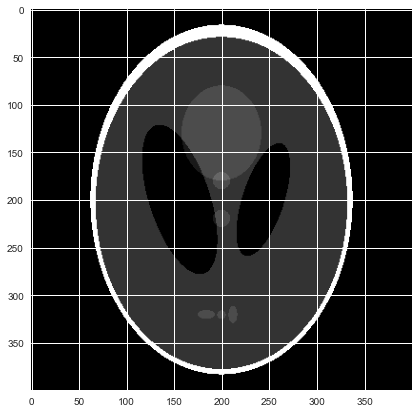

In [28]:
I = imread(data_dir + "/phantom.png", as_gray=True)

plt.figure(figsize=(7, 7))
plt.imshow(I, cmap='gray')
plt.show()

In [29]:
def imshowgray(im, vmin=None, vmax=None):
    plt.imshow(im, cmap=plt.get_cmap('gray'), vmin=vmin, vmax=vmax)

    
def wavMask(dims, scale):
    sx, sy = dims
    res = np.ones(dims)
    NM = np.round(np.log2(dims))
    for n in range(int(np.min(NM)-scale+2)//2):
        res[:int(np.round(2**(NM[0]-n))), :int(np.round(2**(NM[1]-n)))] = \
            res[:int(np.round(2**(NM[0]-n))), :int(np.round(2**(NM[1]-n)))]/2
    return res


def imshowWAV(Wim, scale=1):
    plt.imshow(np.abs(Wim)*wavMask(Wim.shape, scale), cmap = plt.get_cmap('gray'))

    
def coeffs2img(LL, coeffs):
    LH, HL, HH = coeffs
    return np.vstack((np.hstack((LL, LH)), np.hstack((HL, HH))))


def unstack_coeffs(Wim):
        L1, L2  = np.hsplit(Wim, 2) 
        LL, HL = np.vsplit(L1, 2)
        LH, HH = np.vsplit(L2, 2)
        return LL, [LH, HL, HH]

    
def img2coeffs(Wim, levels=4):
    LL, c = unstack_coeffs(Wim)
    coeffs = [c]
    for i in range(levels-1):
        LL, c = unstack_coeffs(LL)
        coeffs.insert(0,c)
    coeffs.insert(0, LL)
    return coeffs
    
    
def dwt2(im):
    coeffs = pywt.wavedec2(im, wavelet='db4', mode='per', level=4)
    Wim, rest = coeffs[0], coeffs[1:]
    for levels in rest:
        Wim = coeffs2img(Wim, levels)
    return Wim


def idwt2(Wim):
    coeffs = img2coeffs(Wim, levels=4)
    return pywt.waverec2(coeffs, wavelet='db4', mode='per')

Reconstruction error: 7.26607737699601e-14


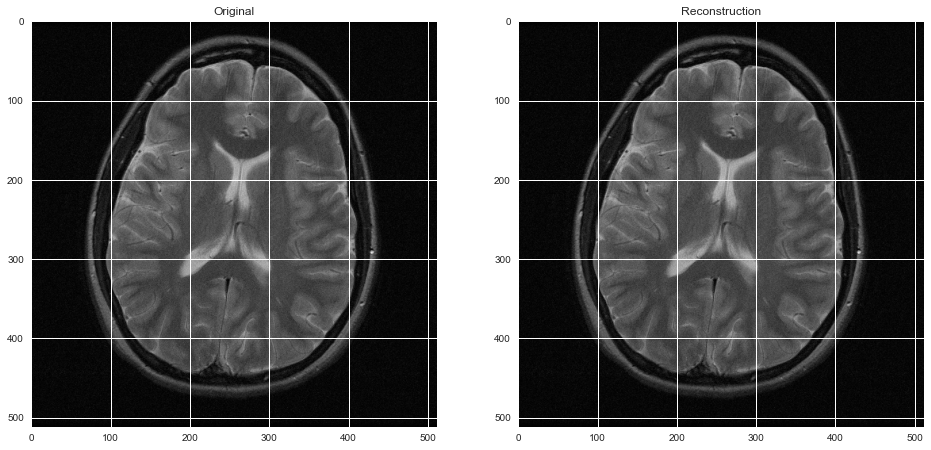

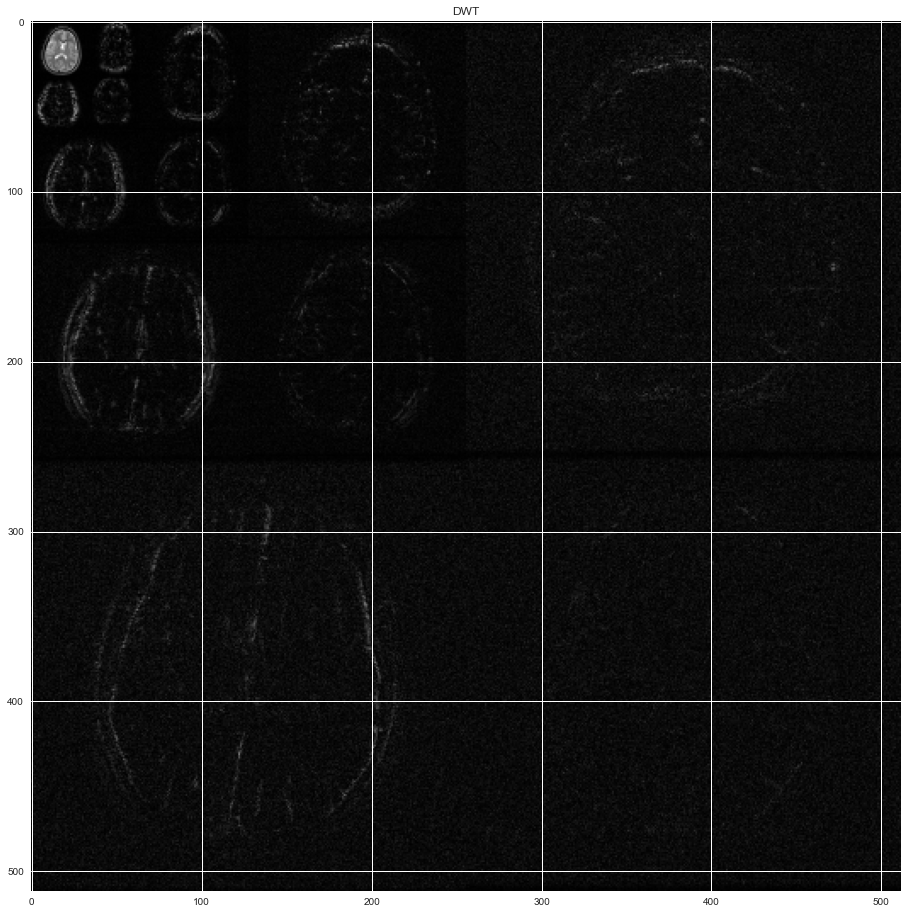

In [30]:
data = np.load("./data/brain.npz")
im, mask_unif, mask_vardens, pdf_unif, pdf_vardens = \
data['im'], data['mask_unif'], data['mask_vardens'], data['pdf_unif'], data['pdf_vardens']

Wim = dwt2(im)
im2 = idwt2(Wim)


plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
imshowgray(np.abs(im))
plt.title('Original')

plt.subplot(1,2,2)
imshowgray(np.abs(im2))
plt.title('Reconstruction')

plt.figure(figsize=(16, 16))
imshowWAV(Wim)
plt.title('DWT')


print('Reconstruction error:', np.linalg.norm(im - im2))

Reconstruction error: 15.303326958445902


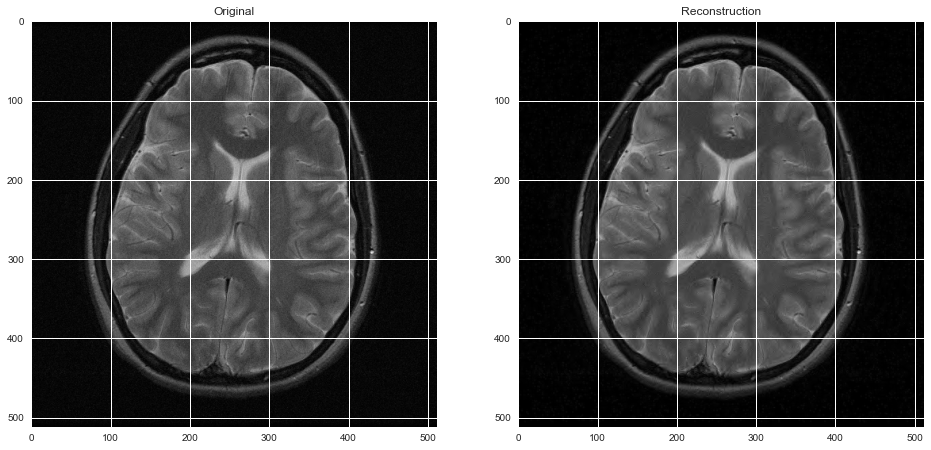

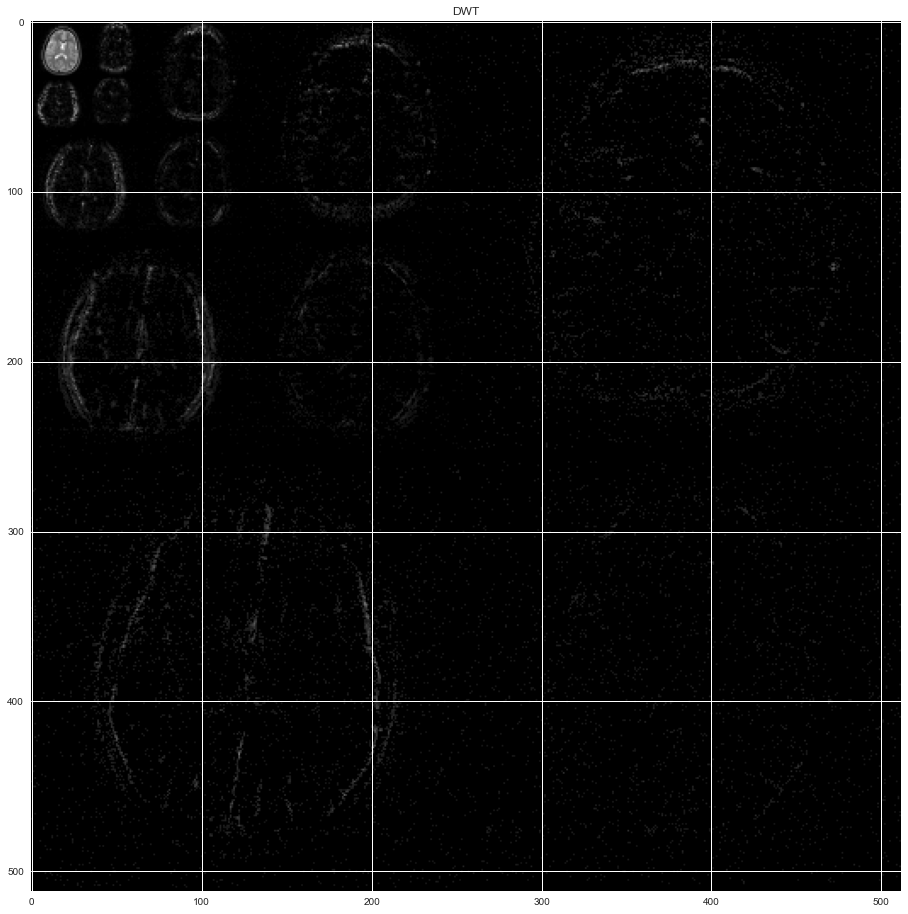

In [31]:
# Wavelet threshold
f = 0.1
m = np.sort(abs(Wim.ravel()))[::-1]
ndx = int(len(m) * f)
thr = m[ndx]
Wim_thr = Wim * (abs(Wim) > thr)

im2 = idwt2(Wim_thr)

plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
imshowgray(np.abs(im))
plt.title('Original')

plt.subplot(1,2,2)
imshowgray(np.abs(im2))
plt.title('Reconstruction')

plt.figure(figsize=(16, 16))
imshowWAV(Wim_thr)
plt.title('DWT')


print('Reconstruction error:', np.linalg.norm(im - im2))

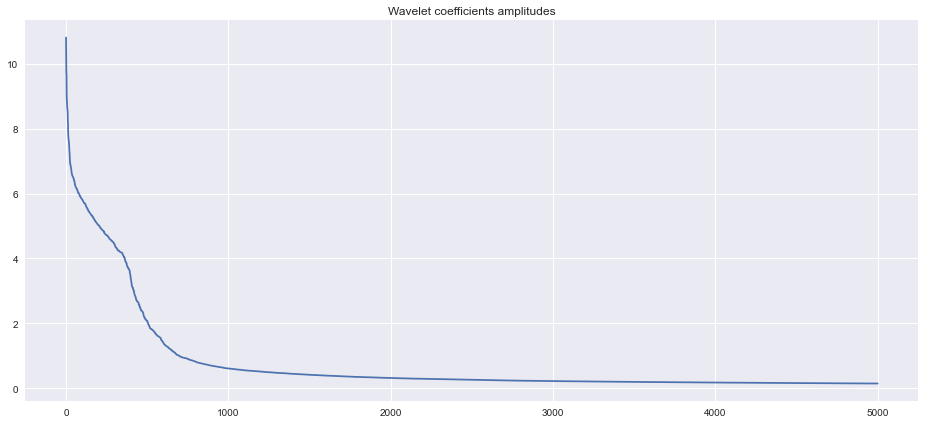

In [32]:
C = -np.sort(-np.abs(Wim).ravel())[:5000]

plt.figure(figsize=(16, 7))
plt.plot(C)
plt.title("Wavelet coefficients amplitudes")
plt.show()

In [33]:
# Wavelet Transform
# http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
# https://www.youtube.com/watch?v=QX1-xGVFqmw

In [54]:
A = np.reshape(np.arange(0, 25, 1), (5, 5))
m, n = A.shape
print(A, A.shape)



m_p, n_p = 2, 3  # Patch height, width

K = np.zeros_like(A)
for i in range(2, 2 + m_p):
    for j in range(1, 1 + n_p):
        K[i, j] = 1

print(np.multiply(A, K))

M = np.zeros((m_p * n_p, m * n))
A = A.flatten()

for i in range(m_p):
    for j in range(n_p):
        i_p = i * n_p + j
        i_i = (i + 2) * n + (1 + j)
        
        M[i_p, i_i] = 1
        
p = M @ A
print(p)

p_i = np.reshape(M.T @ M @ A, (m, n))
print(p_i)

print(M @ M.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] (5, 5)
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0 11 12 13  0]
 [ 0 16 17 18  0]
 [ 0  0  0  0  0]]
[11. 12. 13. 16. 17. 18.]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 11. 12. 13.  0.]
 [ 0. 16. 17. 18.  0.]
 [ 0.  0.  0.  0.  0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
